In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spa

Фон

In [3]:
N = 10000 # Число отсчетов в фоне
Tbg = 821 # Время счета фона
t = 100 # Время счета. Если у вас было все время разное, придется менять все под себя

Алюминий

In [4]:
na = np.array([635166, 401035, 260674, 172165, 113487]) # Отсчеты при 1,2,3,4,5 пластинах алюминия соответсвенно. В блоках ниже то же самое
la = np.array([1.99, 3.99, 5.97, 7.99, 9.99]) # Суммарная толщина пластин алюминия

Свинец

In [5]:
npb = np.array([632665, 356220, 209448, 118688, 76056])
lpb = np.array([0.42, 0.89, 1.35, 1.83, 2.27])

Железо

In [6]:
ni = np.array([563352, 291976,162010,90122, 51017])
li = np.array([1, 2.01, 3.015, 4.035, 5.035])

Объединение всех одинаковых по смыслу массивов в один массив для использования циклов

In [7]:
n = [na, npb, ni]
l = [la, lpb, li]

Погрешности

In [8]:
sigman0 = np.sqrt(N)
epsn0 = sigman0/N
sigmamat = []
epsmat = []
newn = []
for material in n:
  sigma = np.sqrt(material)
  sigmamat.append(sigma)
  epsmat.append(sigma/material)
  newn.append(material - N/Tbg)
sigmamat = np.array(sigmamat)
epsmat = np.array(epsmat)
newn = np.array(newn)
# В цикле сгенерился массив погрешностей отсчетов, относительных погрещностей отсчетов и массив N-N_0, где N_0 - число отсчетов фона
epsn = []
print(epsmat)
for eps in epsmat:
  epsn.append(np.sqrt(eps**2+epsn0**2))
epsn = np.array(epsn)
sigman = epsn*newn #Массив абсолютных погрешностей n_n0
print(epsn)
print(sigman)
deltal = 0.005


[[0.00125475 0.0015791  0.00195862 0.00241006 0.00296843]
 [0.00125723 0.00167549 0.00218505 0.00290266 0.00362605]
 [0.00133232 0.00185066 0.00248444 0.00333108 0.00442734]]
[[0.01007841 0.01012391 0.01019001 0.01028632 0.01043128]
 [0.01007872 0.01013939 0.01023594 0.01041275 0.01063711]
 [0.01008836 0.01016981 0.010304   0.01054021 0.01093624]]
[[6401.34197741 4059.91882116 2656.14533989 1770.81901235 1183.6875061 ]
 [6376.33120777 3611.73043342 2143.77235239 1235.74214933  808.88682358]
 [5683.17718264 2969.21518978 1669.22586853  949.77660654  557.80086587]]


Графики:

Погрешности, как мы видим, довольно маленькие у нас, так что хи-квадрат использовать смысла немного, фитировать будем с помощью МНК

[(array([-0.2145012 , 13.76997406]), array([[ 8.19750429e-06, -4.90702607e-05],
       [-4.90702607e-05,  3.59315139e-04]])), (array([-1.15045147, 13.81867742]), array([[ 0.00041414, -0.00055991],
       [-0.00055991,  0.00093535]])), (array([-0.59232665, 13.80219846]), array([[ 8.49394720e-05, -2.56432266e-04],
       [-2.56432266e-04,  9.47292133e-04]]))]


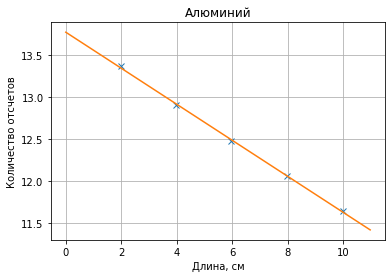

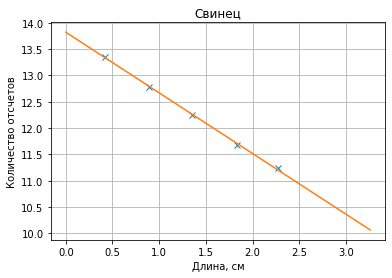

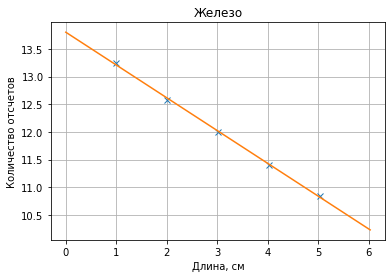

In [9]:
materials = ['Алюминий', 'Свинец', 'Железо']
fits = []
for i in range(0,3):
  fits.append(np.polyfit(l[i], np.log(newn[i]), 1, cov=True))
print(fits)
for i in range(0,3):
  plt.title(materials[i])
  plt.xlabel('Длина, см')
  plt.ylabel('Количество отсчетов')
  plt.grid()
  plt.plot(l[i], np.log(newn[i]), linestyle='', marker='x')
  border = np.max(l[i])
  x = np.arange(0, border+1, 0.01)
  plt.plot(x, fits[i][0][0]*x+fits[i][0][1])
  plt.show()
  


Результат: (поезд сделал бум)


In [14]:
print('Коэффициенты поглощения:\n')
print(f'Алюминия: {-fits[0][0][0]:.3} \u00B1 {np.sqrt(fits[0][1][0][0]):.1}', end='\n')
print(f'Свинца: {-fits[1][0][0]:.3} \u00B1 {np.sqrt(fits[1][1][0][0]):.2}', end='\n')
print(f'Железа: {-fits[2][0][0]:.3} \u00B1 {np.sqrt(fits[2][1][0][0]):.1}', end='\n')

Коэффициенты поглощения:

Алюминия: 0.215 ± 0.003
Свинца: 1.15 ± 0.02
Железа: 0.592 ± 0.009
